In [1]:
import pandas as pd
import numpy as np
import os
f_base = '../长三角城市年度数据/'
files = os.listdir(f_base)
files

['上海市_113个指标.xls',
 '安徽省合肥_111个指标.xls',
 '安徽省安庆_112个指标.xls',
 '安徽省宣城_112个指标.xls',
 '安徽省池州_112个指标.xls',
 '安徽省滁州_112个指标.xls',
 '安徽省芜湖_112个指标.xls',
 '安徽省铜陵_112个指标.xls',
 '安徽省马鞍山_111个指标.xls',
 '江苏省南京市_113个指标.xls',
 '江苏省南通市_113个指标.xls',
 '江苏省常州市_113个指标.xls',
 '江苏省扬州市_113个指标.xls',
 '江苏省无锡市_113个指标.xls',
 '江苏省泰州_113个指标.xls',
 '江苏省盐城市_113个指标.xls',
 '江苏省苏州市_113个指标.xls',
 '江苏省镇江市_113个指标.xls',
 '浙江省台州_112个指标.xls',
 '浙江省嘉兴_113个指标.xls',
 '浙江省宁波_113个指标.xls',
 '浙江省杭州_113个指标.xls',
 '浙江省温州_113个指标.xls',
 '浙江省湖州_112个指标.xls',
 '浙江省绍兴_112个指标.xls',
 '浙江省舟山_112个指标.xls',
 '浙江省金华_112个指标.xls']

In [2]:
# 归一化
def Normalized(data):
    '''
    s = （s - min）/（max-min）
    '''
#     for i in data.columns:
#         data[i]=round((data[i]-np.mean(data[i]))/(np.max(data[i])-np.min(data[i])),3)
    data = (data - data.min()) / (data.max() - data.min())
    return data

In [3]:
def Sum_score(data,col):
    '''
    分数总和命名为col
    将小分加起来
    '''
    sum_score = pd.DataFrame(columns=col)
    for i in data.index:
        sum_score.loc[i] = np.mean(data.loc[i])
    return sum_score

In [4]:
def Eduscore(data,localname,eduscore):
    local_eduscore = pd.DataFrame()
    local_eduscore['教育投入占比'] = data['一般公共预算支出_教育_市辖区']/data['GDP_市辖区']
    local_eduscore['师生比'] = (data['普通高等学校在校生数_市辖区']+data['普通中学在校生数_市辖区']+data['普通小学在校生数_市辖区'])/(data['普通高等学校专任教师数_市辖区']+data['普通中学专任教师数_市辖区']+data['普通小学专任教师数_市辖区'])
    local_eduscore['公共图书馆占比'] = data['公共图书馆总藏量_市辖区'] / data['城市户籍人口数']
    eduscore1 = pd.DataFrame(columns = ['教育投入占比','师生比','公共图书馆占比'])
    eduscore1.loc[localname] = [np.mean(local_eduscore['教育投入占比']),np.mean(local_eduscore['师生比']),np.mean(local_eduscore['公共图书馆占比'])]
    eduscore =pd.concat([eduscore,eduscore1],axis=0)
    return eduscore

In [5]:
def Traffic(data,localname,trafficscore):
    traffic_data = pd.DataFrame()
    traffic_data['道路'] = data['城市道路面积']/data['城市建成区面积']
    traffic_data['交通从业人员比例'] = data['城镇单位就业人员数_交通运输、仓储和邮政业_市辖区']/data['城镇单位在岗职工人数_市辖区']
    traffic_data['公共交通'] = (data['出租汽车运营数_市辖区']+data['公共汽、电车运营数_市辖区'])/data['城市年末公共汽(电)车客运总量']
    trafficscore1 = pd.DataFrame(columns = ['道路','交通从业人员比例','公共交通'])
    trafficscore1.loc[localname] = [np.mean(traffic_data['道路']),np.mean(traffic_data['交通从业人员比例']),np.mean(traffic_data['公共交通'])]
    trafficscore =pd.concat([trafficscore,trafficscore1],axis=0)
    return trafficscore

In [6]:
def Medical(data,localname,medicalscore):
    medical_data = pd.DataFrame()
    medical_data['医师'] = data['医院和卫生院卫生人员数_执业(助理)医师_市辖区']/data['城市户籍人口数']
    medical_data['医疗机构'] = data['医疗卫生机构数_医院和卫生院_市辖区']/data['城市户籍人口数']
    medical_data['床位'] = data['医疗卫生机构床位数_医院和卫生院_市辖区']/data['医疗卫生机构数_医院和卫生院_市辖区']
    medicalscore1 = pd.DataFrame(columns =medical_data.columns)
    medicalscore1.loc[localname] = [np.mean(medical_data['医师']),np.mean(medical_data['医疗机构']),np.mean(medical_data['床位'])]
    medicalscore =pd.concat([medicalscore,medicalscore1],axis=0)
    return medicalscore

In [7]:
def Score():
    score = pd.DataFrame()
    eduscore = pd.DataFrame()
    trafficscore = pd.DataFrame()
    medicalscore = pd.DataFrame()
    for f in files:
        '''
        每个地区数据预处理
        本次只根据2016年的数据进行计算
        '''
        data = pd.read_excel(f_base+f)
        data['地区']= data.iloc[0,1]
        localname = data.iloc[0,1]
        data.drop(index=[0,1,2],inplace=True)
        data.index=data['指标']
        data.index.name='年份'
        data.drop(columns=['指标'],inplace=True)
        data.columns.name='指标'
        # data = data.convert_dtypes()
        data.describe()
        '''计算得分'''
        eduscore = Eduscore(data,localname,eduscore)
        trafficscore = Traffic(data,localname,trafficscore)
        medicalscore = Traffic(data,localname,medicalscore)
        
    # eduscore
    eduscore.to_excel('../细分指标/教育细分指标.xlsx')
    eduscore = Normalized(eduscore)
    plt = eduscore.plot.bar(figsize=(15,10),title = '教育细分指标')
    img = plt.get_figure()
    img.savefig('../image/eduscore.png')
    eduscore = round(Sum_score((eduscore),['教育'])*10,1)
    
    # traffic
    trafficscore.to_excel('../细分指标/交通细分指标.xlsx')
    trafficscore = Normalized(trafficscore)
    plt = trafficscore.plot.bar(figsize=(15,10),title = '交通细分指标')
    img = plt.get_figure()
    img.savefig('../image/trafficscore.png')
    trafficscore = round(Sum_score((trafficscore),['交通'])*10,1)

    # medical
    medicalscore.to_excel('../细分指标/医疗细分指标.xlsx')
    medicalscore = Normalized(medicalscore)
    plt = medicalscore.plot.bar(figsize=(15,10),title = '医疗细分指标')
    img = plt.get_figure()
    img.savefig('../image/medicalscore.png')
    medicalscore = round(Sum_score((medicalscore),['医疗'])*10,1)

    # score
    score=pd.concat([eduscore,trafficscore,medicalscore],axis = 1)
    score['平均分']=score.mean(axis=1)
    
    return score

In [8]:
score = Score()
score

,教育,交通,医疗,平均分
上海市,6.8,5.2,5.2,5.733333
合肥市,5.0,3.4,3.4,3.933333
安庆市,2.3,3.8,3.8,3.300000
宣城市,2.3,3.6,3.6,3.166667
池州市,4.2,6.2,6.2,5.533333
滁州市,3.5,4.4,4.4,4.100000
芜湖市,4.0,4.3,4.3,4.200000
铜陵市,2.1,1.0,1.0,1.366667
马鞍山市,2.0,1.1,1.1,1.400000
南京市,5.3,4.2,4.2,4.566667


In [9]:
score = score.sort_values(by='平均分',ascending=False)

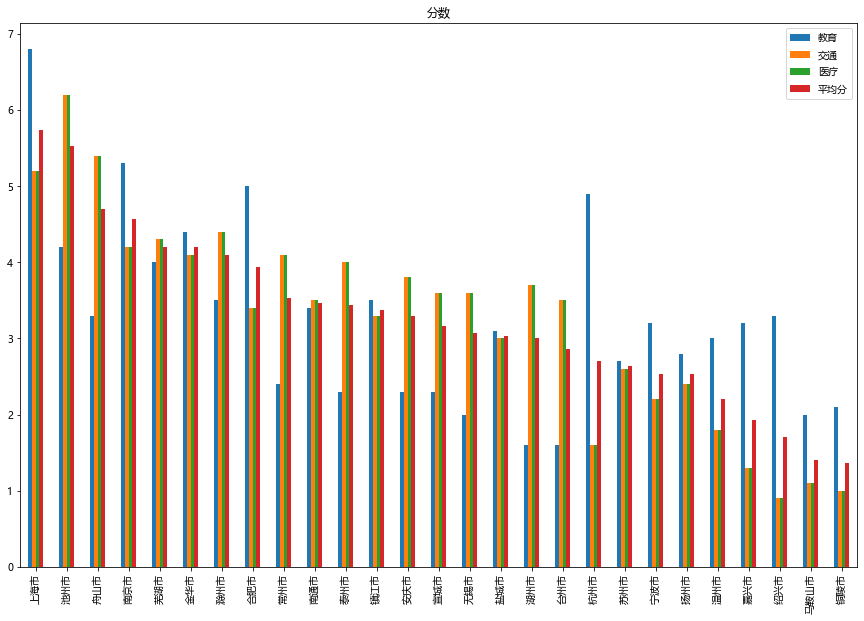

In [10]:
%matplotlib inline
plt = score.plot.bar(figsize=(15,10),title = '分数')
img = plt.get_figure()
img.savefig('../image/score.png')

In [11]:
score.to_excel('../指标.xlsx')